Python notebook to calculate tokenizer fertility and other potential stats based on a small text sample.

## Data loading and Libraries

In [2]:
import pandas as pd


In [3]:
# /home/p0l3/RAD/CWED4ETA/CWED4ETA/CWED4ETA/RESULTS/GLINER_TS_LS/
IDs = [10061, 10167, 10662, 1072, 10756, 12778, 13006, 13798, 16783, 16811, 170785, 170943, 171290, 171401, 20390, 21622, 22971, 2416, 27835, 28638, 28901, 30003, 32771, 33310, 35800, 36618, 39322, 40290, 41282, 45266, 46034, 48798, 50441, 53166, 55512, 56596, 62269, 63539, 65955, 6641, 71590, 72392, 72508, 72553, 75726, 84006, 86033, 87857, 90439, 99773]


In [4]:
import os
DIR = "/home/p0l3/RAD/REL_DIS/REL_DIS/TOKENIZED/PAPERS_SENTENCES"

file_list = os.listdir(DIR)

sample_list = [f for f in file_list if int(f.split("_")[0]) in IDs and "DUP" not in f]

In [5]:
from transformers import BertTokenizer, RobertaTokenizer

# Load SciBERT tokenizer
tokenizer1 = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
tokenizer2 = BertTokenizer.from_pretrained("P0L3/clirebert_clirevocab_uncased")
tokenizer3 = RobertaTokenizer.from_pretrained("climatebert/distilroberta-base-climate-f")

def average_subwords_per_word(tokenizer, paper_text: str):
    # Basic whitespace-based word split
    words = paper_text.strip().split()
    
    total_subwords = 0
    for word in words:
        subwords = tokenizer.tokenize(word)
        # print(f"Word: {word} --> Subwords: {subwords}")
        total_subwords += len(subwords)
    
    if len(words) == 0:
        return 0.0
    return round(total_subwords / len(words), 5)

print("SciBERT\tCliReBERT")
for paper in sample_list:
    with open(DIR + "/" + paper) as f:
        paper_text = f.read()
    
    print(average_subwords_per_word(tokenizer1, paper_text), "\t", average_subwords_per_word(tokenizer2, paper_text))


SciBERT	CliReBERT
1.33916 	 1.34335
1.40674 	 1.38244
1.29262 	 1.27491
1.25987 	 1.25032
1.29255 	 1.25311
1.31542 	 1.30128
1.32853 	 1.27789
1.3281 	 1.28938
1.38939 	 1.32513
1.35806 	 1.35105
1.41716 	 1.39104
1.31238 	 1.30949
1.306 	 1.31114
1.44254 	 1.43718
1.42929 	 1.39098
1.23597 	 1.22031
1.333 	 1.31451
1.43124 	 1.42941
1.32177 	 1.32236
1.25922 	 1.20968
1.48871 	 1.467
1.32312 	 1.27707
1.37911 	 1.35962
1.41137 	 1.31825
1.43829 	 1.4265
1.38662 	 1.2899
1.24777 	 1.24287
1.21811 	 1.23822
1.4356 	 1.38173
1.30649 	 1.29806
1.32805 	 1.26233
1.32689 	 1.32161
1.55063 	 1.46743
1.39934 	 1.36252
1.48628 	 1.47102
1.35349 	 1.27833
1.35493 	 1.32938
1.46724 	 1.41048
1.27825 	 1.23212
1.23356 	 1.23989
1.38459 	 1.30504
1.30115 	 1.29541
1.41204 	 1.34214
1.34562 	 1.31294
1.29299 	 1.19888
1.28081 	 1.22643
1.34841 	 1.36827
1.3988 	 1.33028
1.36989 	 1.32003
1.33379 	 1.29618


In [6]:
import matplotlib.pyplot as plt

scibert_scores = []
clirebert_scores = []
climatebert_scores = []
paper_labels = []

for paper in sample_list:
    with open(DIR + "/" + paper) as f:
        paper_text = f.read()
    
    sci_score = average_subwords_per_word(tokenizer1, paper_text)
    cli_score = average_subwords_per_word(tokenizer2, paper_text)
    climate_score = average_subwords_per_word(tokenizer3, paper_text)

    scibert_scores.append(sci_score)
    clirebert_scores.append(cli_score)
    climatebert_scores.append(climate_score)
    
    paper_labels.append(paper.split("_")[0])

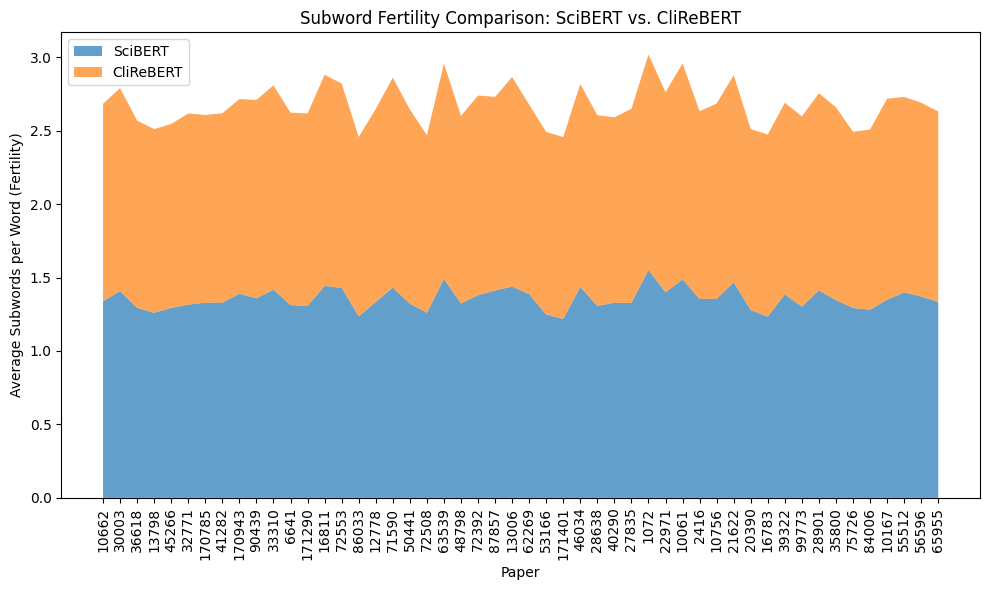

In [10]:
# Create stackplot
x = list(range(len(sample_list)))

plt.figure(figsize=(10, 6))
plt.stackplot(x, scibert_scores, clirebert_scores, labels=["SciBERT", "CliReBERT"], alpha=0.7)

plt.xticks(x, paper_labels, rotation=90)
plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility Comparison: SciBERT vs. CliReBERT")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

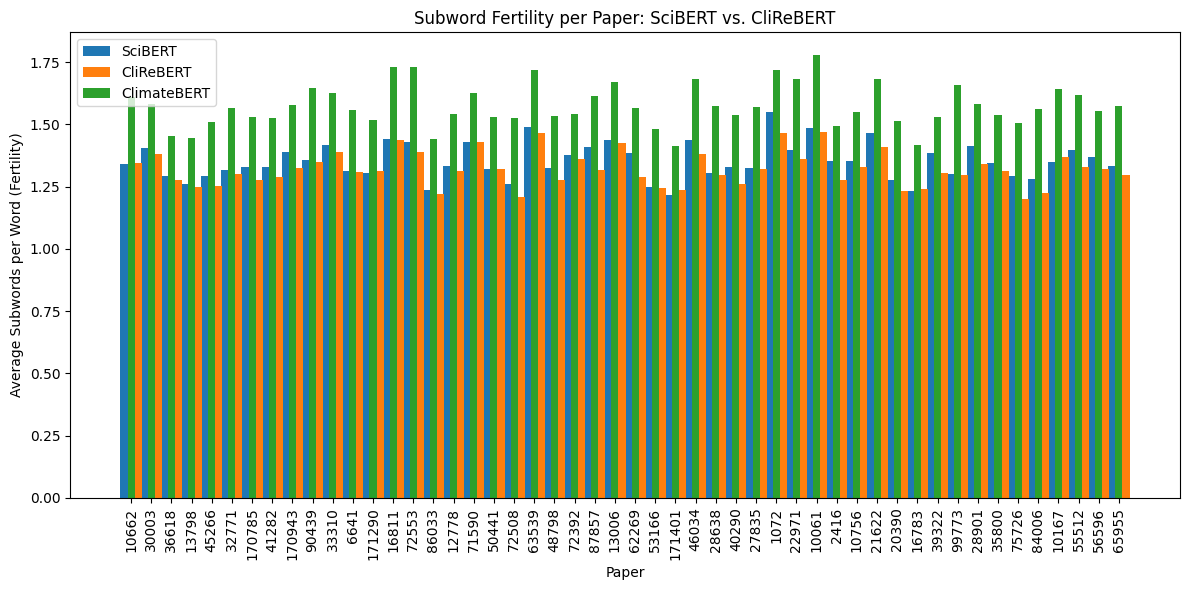

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sample_list))  # X locations for groups
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width, scibert_scores, width, label="SciBERT")
plt.bar(x + width, clirebert_scores, width, label="CliReBERT")
plt.bar(x, climatebert_scores, width, label="ClimateBERT")

plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility per Paper: SciBERT vs. CliReBERT")
plt.xticks(x, paper_labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


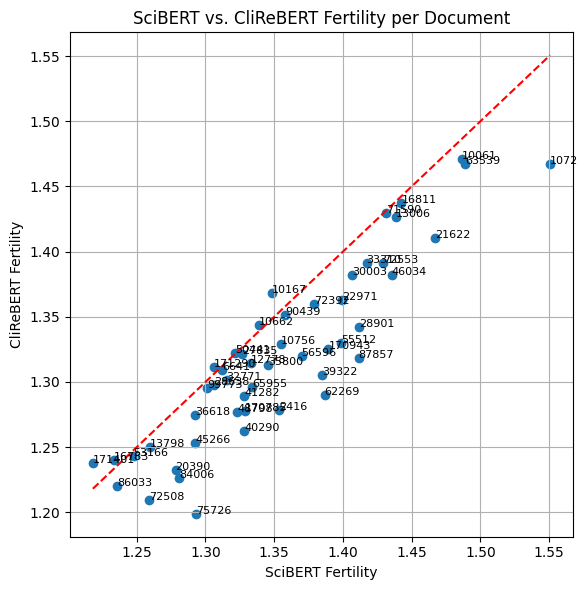

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(scibert_scores, clirebert_scores)

for i, label in enumerate(paper_labels):
    plt.text(scibert_scores[i], clirebert_scores[i], label, fontsize=8)

plt.plot([min(scibert_scores), max(scibert_scores)], [min(scibert_scores), max(scibert_scores)], 'r--')
plt.xlabel("SciBERT Fertility")
plt.ylabel("CliReBERT Fertility")
plt.title("SciBERT vs. CliReBERT Fertility per Document")
plt.grid(True)
plt.tight_layout()
plt.show()


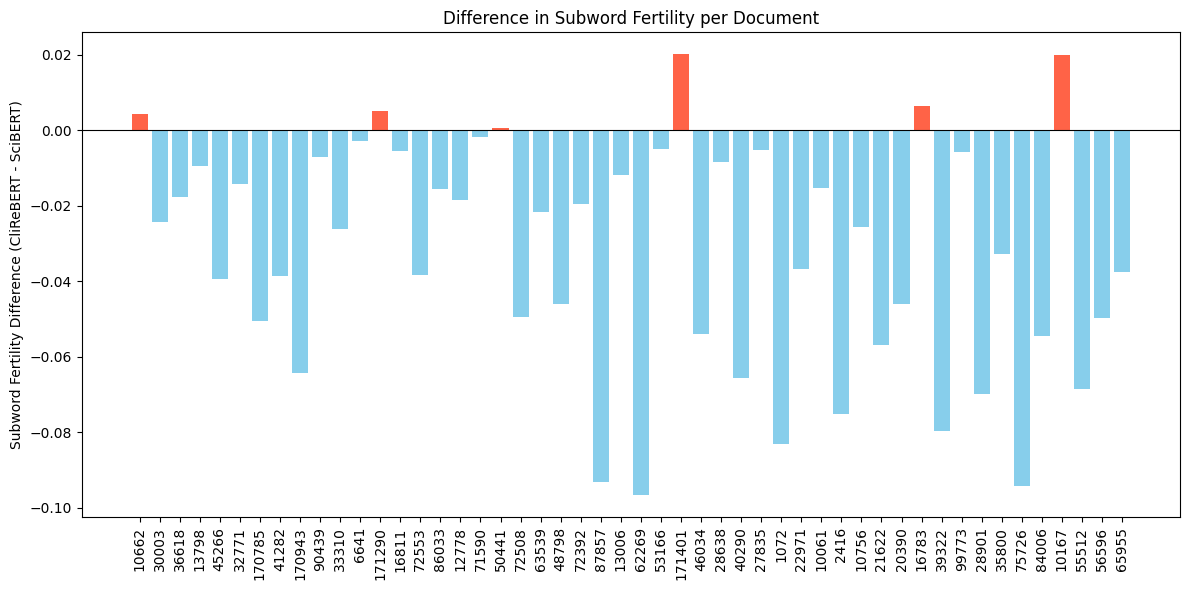

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(scibert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - SciBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


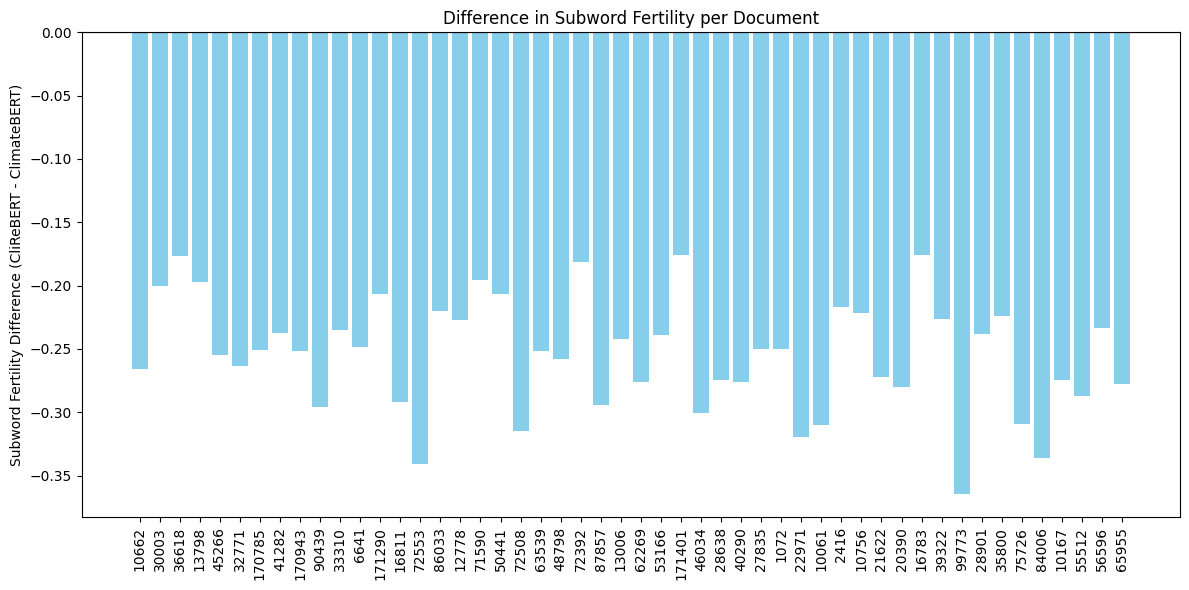

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(climatebert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - ClimateBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()